In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
start = '2018-01-01'
end = '2021-01-01'

In [6]:
data = yf.download('CL=F PTTEP.BK', start=start, end=end, periods=1)
# CL=F  -> WTI3 Oil price

[*********************100%***********************]  2 of 2 completed


# compare oilprice with PTTEP

In [7]:
df = data['Adj Close']

In [9]:
df

,CL=F,PTTEP.BK
Date,,
2018-01-02,60.369999,NaN
2018-01-03,61.630001,80.119003
2018-01-04,62.009998,83.671089
2018-01-05,61.439999,84.460434
2018-01-08,61.730000,83.276405
...,...,...
2020-12-25,NaN,87.916382
2020-12-28,47.619999,86.549805
2020-12-29,48.000000,89.055191


In [8]:
df.isnull().sum()

CL=F        23
PTTEP.BK    47
dtype: int64

In [10]:
df.dropna(inplace=True)
# clear nan

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_89915/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [11]:
df

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,80.119003
2018-01-04,62.009998,83.671089
2018-01-05,61.439999,84.460434
2018-01-08,61.730000,83.276405
2018-01-09,62.959999,84.460434
...,...,...
2020-12-23,48.119999,86.777565
2020-12-24,48.230000,87.233093
2020-12-28,47.619999,86.549805


In [12]:
df.isnull().sum()

CL=F        0
PTTEP.BK    0
dtype: int64

In [13]:
df.loc['2020-04-15':'2020-04-24']

,CL=F,PTTEP.BK
Date,,
2020-04-15,19.870001,70.167038
2020-04-16,19.870001,66.356049
2020-04-17,18.270000,68.597801
2020-04-20,-37.630001,70.839561
2020-04-21,10.010000,68.373619
2020-04-22,13.780000,67.028572
2020-04-23,16.500000,68.149452
2020-04-24,16.940001,68.373619


<AxesSubplot:xlabel='Date'>

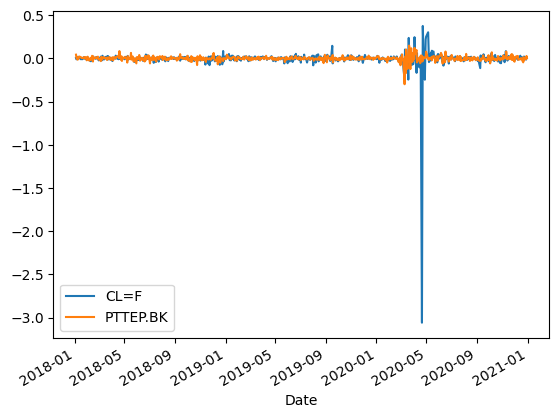

In [14]:
df.pct_change().plot()

(-3.0, 3.0)

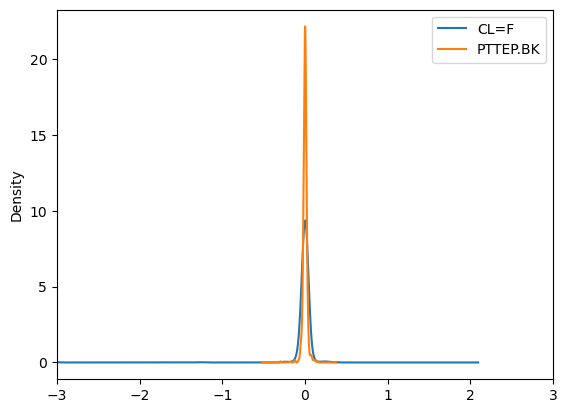

In [68]:
df.pct_change().plot.kde()
plt.xlim(-3,3)

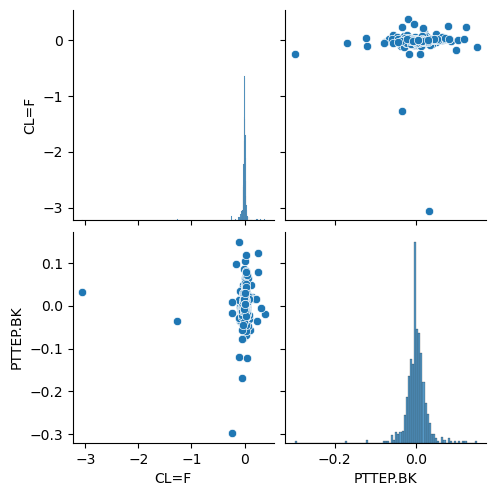

In [108]:
import seaborn as sns
sns.pairplot(df.pct_change())
plt.show()

# remove outlier manual 

In [72]:
df_ret = df.pct_change()

In [16]:
df_ret.loc['2020-04-15':'2020-04-24']


,CL=F,PTTEP.BK
Date,,
2020-04-15,-0.011934,-0.027950
2020-04-16,0.000000,-0.054313
2020-04-17,-0.080523,0.033784
2020-04-20,-3.059661,0.032680
2020-04-21,-1.266011,-0.034810
2020-04-22,0.376623,-0.019672
2020-04-23,0.197388,0.016722
2020-04-24,0.026667,0.003289


In [25]:
df_ret.loc[(df_ret['CL=F']<-1)|(df_ret['CL=F']>1)]
#check is over more than - 1 sd and 1 sd

,CL=F,PTTEP.BK
Date,,
2020-04-20,-3.059661,0.03268
2020-04-21,-1.266011,-0.03481


In [17]:
start_remove = '2020-04-17'
end_remove = '2020-04-22'

In [18]:
df_remove = df_ret.loc[:start_remove].append(df_ret.loc[end_remove:])


/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_89915/1296772722.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_remove = df_ret.loc[:start_remove].append(df_ret.loc[end_remove:])


In [19]:
df_remove

,CL=F,PTTEP.BK
Date,,
2018-01-03,NaN,NaN
2018-01-04,0.006166,0.044335
2018-01-05,-0.009192,0.009434
2018-01-08,0.004720,-0.014019
2018-01-09,0.019925,0.014218
...,...,...
2020-12-23,0.023394,-0.023077
2020-12-24,0.002286,0.005249
2020-12-28,-0.012648,-0.007833


In [23]:
df_remove.loc['2020-04-15':'2020-04-24']

,CL=F,PTTEP.BK
Date,,
2020-04-15,-0.011934,-0.027950
2020-04-16,0.000000,-0.054313
2020-04-17,-0.080523,0.033784
2020-04-22,0.376623,-0.019672
2020-04-23,0.197388,0.016722
2020-04-24,0.026667,0.003289


<AxesSubplot:xlabel='Date'>

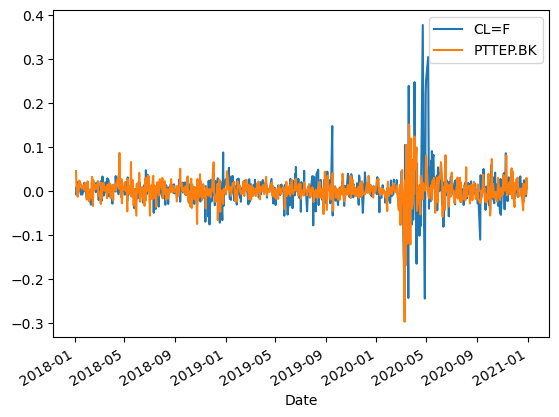

In [26]:
df_remove.plot()

# 2 Standardize

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler


In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(df)

StandardScaler()

In [33]:
df_std = scaler.transform(df)

In [34]:
df_std = pd.DataFrame(df_std, columns=df.columns)
df_std

,CL=F,PTTEP.BK
0,0.589278,-1.210682
1,0.617857,-0.979414
2,0.574989,-0.928022
3,0.596799,-1.005111
4,0.689305,-0.928022
...,...,...
704,-0.426787,-0.777159
705,-0.418514,-0.747500
706,-0.464391,-0.791988
707,-0.435812,-0.628868


In [35]:
df.mean()

CL=F        53.794725
PTTEP.BK    98.714088
dtype: float64

In [38]:
df.std()

CL=F        13.305778
PTTEP.BK    15.370026
dtype: float64

In [39]:
df_std.describe()

,CL=F,PTTEP.BK
count,7.090000e+02,7.090000e+02
mean,1.936235e-16,-1.614443e-16
std,1.000706e+00,1.000706e+00
min,-6.875905e+00,-3.216018e+00
25%,-6.366181e-01,-7.326714e-01
50%,1.846572e-01,3.444393e-01
75%,7.223973e-01,7.130114e-01
max,1.700858e+00,2.096675e+00


In [40]:
import matplotlib.pyplot as plt

(-3.0, 3.0)

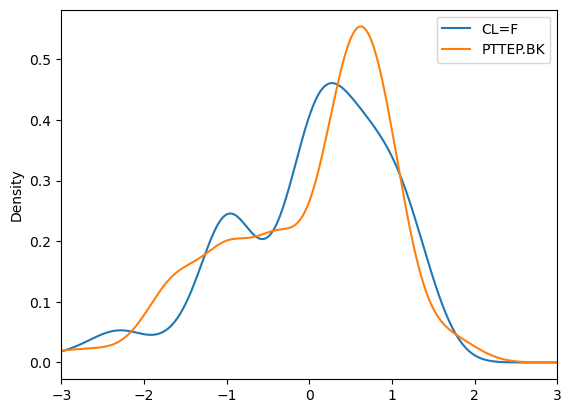

In [43]:
df_std.plot.kde()
plt.xlim(-3,3)

<AxesSubplot:ylabel='Frequency'>

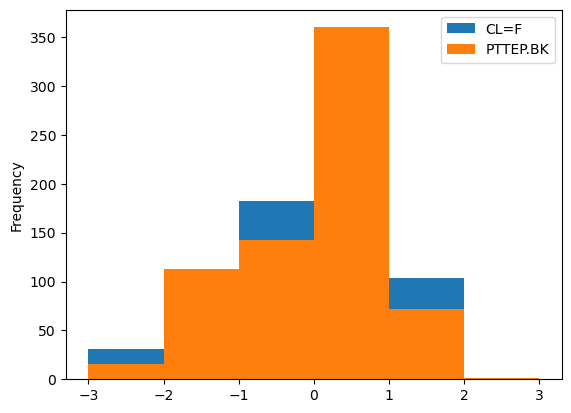

In [44]:
df_std.plot.hist(bins=[-3,-2,-1,0,1,2,3])

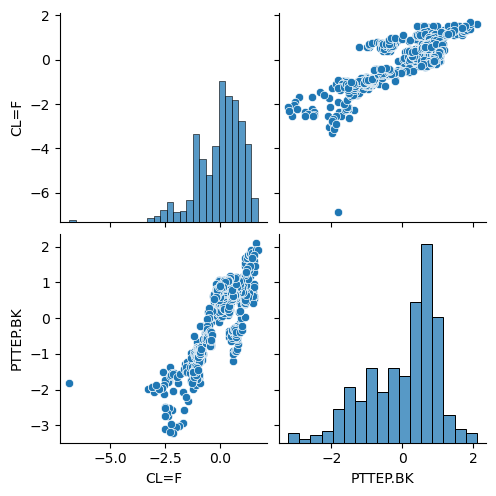

In [109]:
import seaborn as sns
sns.pairplot(df_std)
plt.show()

In [48]:
df_std

,CL=F,PTTEP.BK
0,0.589278,-1.210682
1,0.617857,-0.979414
2,0.574989,-0.928022
3,0.596799,-1.005111
4,0.689305,-0.928022
...,...,...
704,-0.426787,-0.777159
705,-0.418514,-0.747500
706,-0.464391,-0.791988
707,-0.435812,-0.628868


In [51]:
df_std.loc[(df_std > 3).any(axis=1)|(df_std<-3).any(1)]

,CL=F,PTTEP.BK
522,-1.887333,-3.026275
523,-2.018948,-3.040871
524,-2.513819,-3.099254
525,-2.149059,-3.216018
527,-2.288946,-3.186827
545,-6.875905,-1.814844
546,-3.292978,-1.975396
547,-3.009443,-2.062969
550,-3.084651,-1.931609
551,-3.117743,-1.931609


In [45]:
outlier_3sd = df_std.loc[~((df_std > 3).any(1) | (df_std < -3).any(1))]

<AxesSubplot:ylabel='Frequency'>

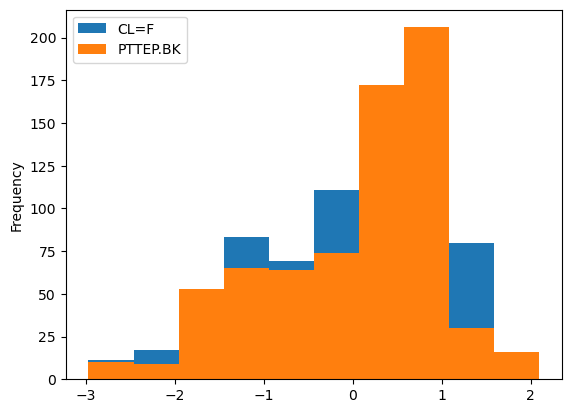

In [46]:
outlier_3sd.plot.hist()

<AxesSubplot:ylabel='Density'>

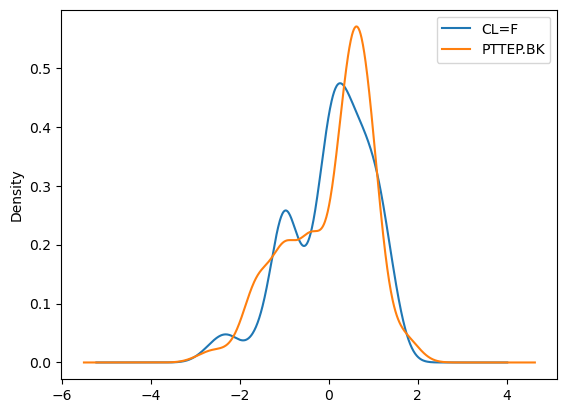

In [47]:
outlier_3sd.plot.kde()

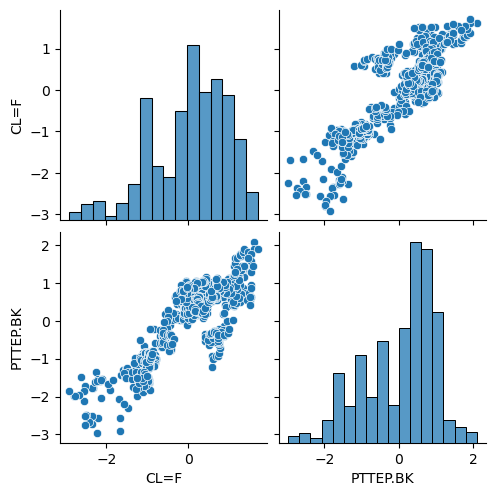

In [110]:
import seaborn as sns
sns.pairplot(outlier_3sd)
plt.show()

# robust

In [52]:
transformer = RobustScaler( quantile_range=(25.0, 75.0)).fit(df)

In [53]:
df_robust=transformer.transform(df)

In [54]:
df_robust

array([[ 0.29773111, -1.07570019],
       [ 0.31876029, -0.91572879],
       [ 0.28721631, -0.88017993],
       ...,
       [-0.47758723, -0.78608323],
       [-0.45655784, -0.6732509 ],
       [-0.43442162, -0.65273577]])

In [57]:
df_robust = pd.DataFrame(df_robust,columns=df.columns)

In [58]:
df_robust

,CL=F,PTTEP.BK
0,0.297731,-1.075700
1,0.318760,-0.915729
2,0.287216,-0.880180
3,0.303265,-0.933504
4,0.371334,-0.880180
...,...,...
704,-0.449917,-0.775826
705,-0.443830,-0.755311
706,-0.477587,-0.786083
707,-0.456558,-0.673251


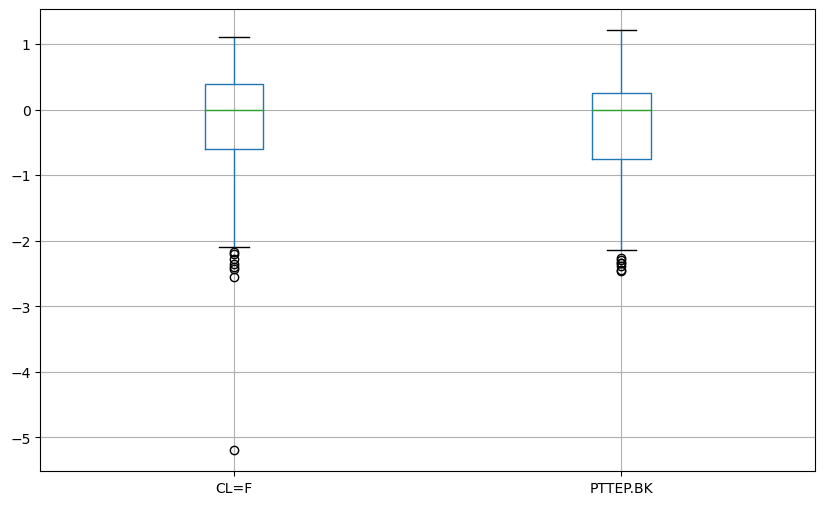

In [60]:
df_robust.boxplot(figsize=(10,6))
plt.show()

(-3.0, 3.0)

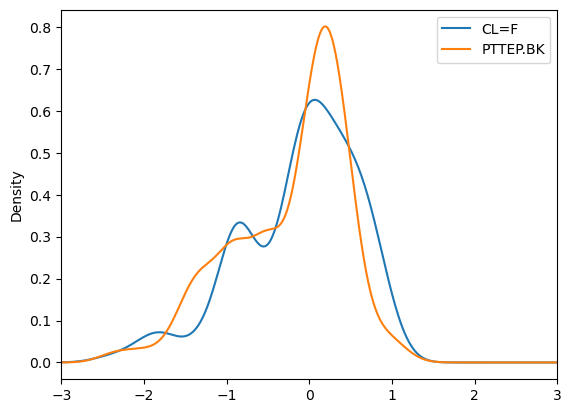

In [65]:
df_robust.plot.kde()
plt.xlim(-3,3)

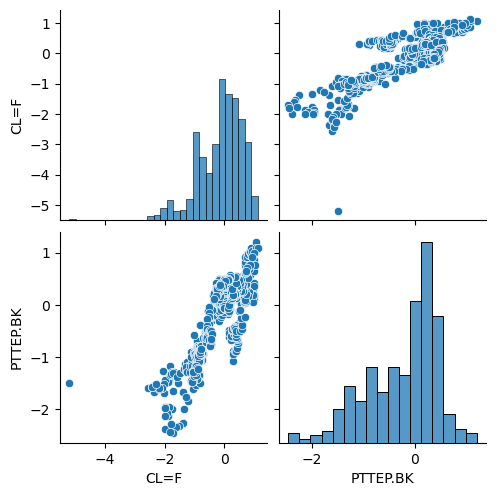

In [111]:
import seaborn as sns
sns.pairplot(df_robust)
plt.show()

# Normalized

In [73]:
df_normalized = pd.DataFrame(df,columns=df.columns)


In [74]:
df_normalized

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,80.119003
2018-01-04,62.009998,83.671089
2018-01-05,61.439999,84.460434
2018-01-08,61.730000,83.276405
2018-01-09,62.959999,84.460434
...,...,...
2020-12-23,48.119999,86.777565
2020-12-24,48.230000,87.233093
2020-12-28,47.619999,86.549805


In [76]:
low = .05
high = .95
quant_df = df_normalized.quantile([low, high])

In [77]:
quant_df

,CL=F,PTTEP.BK
0.05,27.194,71.288631
0.95,70.966,116.598221


In [81]:
filt_df_x = df_normalized.apply(lambda x: x[(x>quant_df.loc[low,x.name])&  (x <= quant_df.loc[high,x.name])], axis=0)

In [82]:
filt_df_x

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,80.119003
2018-01-04,62.009998,83.671089
2018-01-05,61.439999,84.460434
2018-01-08,61.730000,83.276405
2018-01-09,62.959999,84.460434
...,...,...
2020-12-23,48.119999,86.777565
2020-12-24,48.230000,87.233093
2020-12-28,47.619999,86.549805


In [83]:
filt_df_x.dropna()

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,80.119003
2018-01-04,62.009998,83.671089
2018-01-05,61.439999,84.460434
2018-01-08,61.730000,83.276405
2018-01-09,62.959999,84.460434
...,...,...
2020-12-23,48.119999,86.777565
2020-12-24,48.230000,87.233093
2020-12-28,47.619999,86.549805


# alternative way

In [87]:
Q1 = df_normalized.quantile(0.05)
Q3 = df_normalized.quantile(0.95)

In [88]:
filt_manual_df = df_normalized[~((df_normalized < Q1) | (df_normalized > Q3 )).any(axis=1)]
filt_manual_df

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,80.119003
2018-01-04,62.009998,83.671089
2018-01-05,61.439999,84.460434
2018-01-08,61.730000,83.276405
2018-01-09,62.959999,84.460434
...,...,...
2020-12-23,48.119999,86.777565
2020-12-24,48.230000,87.233093
2020-12-28,47.619999,86.549805


<AxesSubplot:xlabel='Date'>

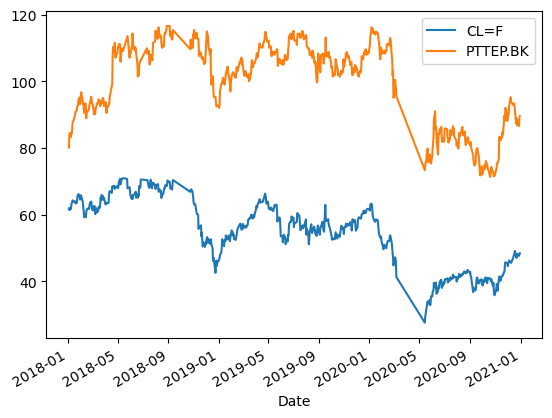

In [90]:
filt_manual_df.plot()

# minmax scaler

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [94]:
scaler.fit(df_normalized)

MinMaxScaler()

In [101]:
df_normal_scaled = scaler.transform(df_normalized)

In [102]:
df_normal_scaled

array([[0.87039633, 0.37746131],
       [0.87372847, 0.42099251],
       [0.86873023, 0.43066602],
       ...,
       [0.74754469, 0.45627149],
       [0.75087686, 0.48697528],
       [0.75438442, 0.49255782]])

In [103]:
df_normal_scaled = pd.DataFrame(df_normal_scaled,columns=df.columns)

In [104]:
df_normal_scaled

,CL=F,PTTEP.BK
0,0.870396,0.377461
1,0.873728,0.420993
2,0.868730,0.430666
3,0.871273,0.416156
4,0.882059,0.430666
...,...,...
704,0.751929,0.459063
705,0.752894,0.464645
706,0.747545,0.456271
707,0.750877,0.486975


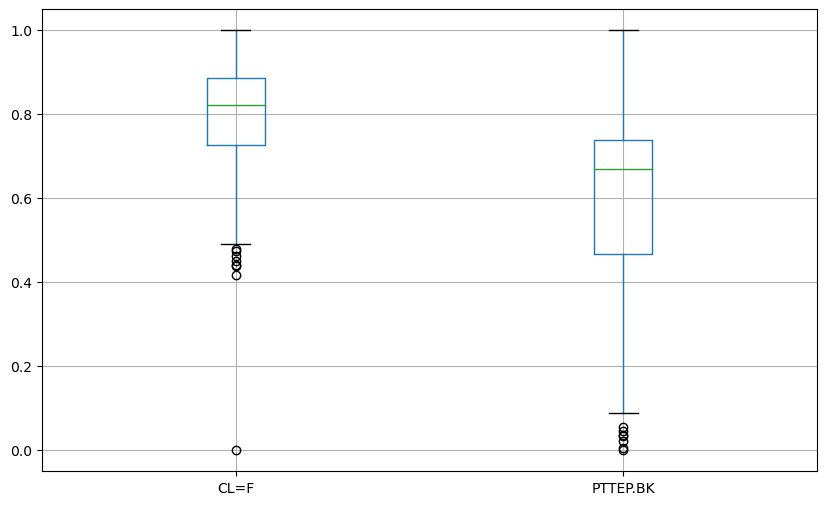

In [105]:
df_normal_scaled.boxplot(figsize=(10,6))
plt.show()

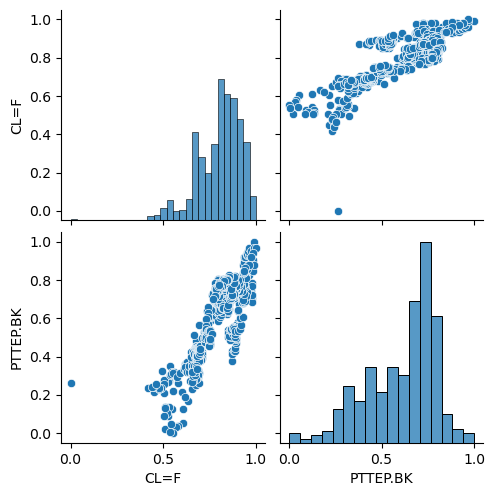

In [106]:
import seaborn as sns
sns.pairplot(df_normal_scaled)
plt.show()

(-0.5, 1.5)

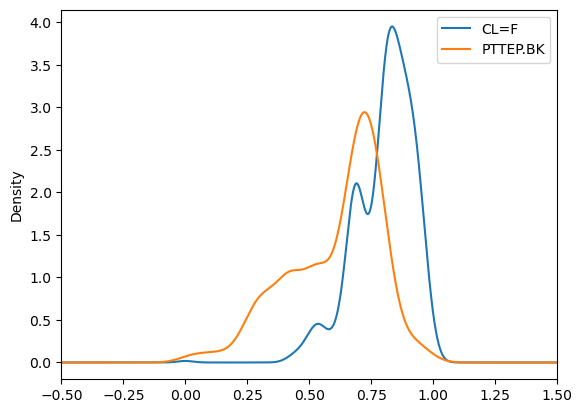

In [107]:
df_normal_scaled.plot.kde()
plt.xlim(-.5,1.5)